In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## The HDF5 event files
The dataframes (called 'Particles') are stored in HDF5 files. There is one file for simulated 2vbb events, and one file for simulated background events. The backrounds simulated are Tl208, Bi214, Co60, and K40.

For the backgrounds, there is one entry per event, and for 2vbb, there are two entries per event (one for each primary electron). All of the 2vbb events can be keyed by the 'event' attribute, which is unique.

In [3]:
'''
Load in dataframe:
'''

fname = '../files/Xe2nu_NEW_1d.h5'
df_particles = pd.read_hdf(fname, 'Particles')

In [4]:
'''
Look at which variables are stored in 2vbb the dataframe:
'''
print('True MC 2vbb variables:')
print(df_particles.columns.tolist()[:17])
print()
print('Reconstructed 2vbb variables:')
print(df_particles.columns.tolist()[17:])

True MC 2vbb variables:
['particle_indx', 'particle_name', 'primary', 'kin_energy', 'initial_x', 'initial_y', 'initial_z', 'final_x', 'final_y', 'final_z', 'momentum_x', 'momentum_y', 'momentum_z', 'momentum', 'event', 'evt_energy', 'opening_angle']

Reconstructed 2vbb variables:
['nS2', 'reco_energy', 'reco_length', 'reco_numb_of_tracks', 'reco_x_min', 'reco_y_min', 'reco_z_min', 'reco_r_min', 'reco_x_max', 'reco_y_max', 'reco_z_max', 'reco_r_max', 'reco_x_ave', 'reco_y_ave', 'reco_z_ave', 'reco_r_ave', 'reco_extreme1_x', 'reco_extreme1_y', 'reco_extreme1_z', 'reco_extreme2_x', 'reco_extreme2_y', 'reco_extreme2_z', 'reco_blob1_x', 'reco_blob1_y', 'reco_blob1_z', 'reco_blob2_x', 'reco_blob2_y', 'reco_blob2_z', 'reco_eblob1', 'reco_eblob2', 'reco_ovlp_blob_energy']


# Analysis cuts:
Recreate the NEXT NEW 2vbb analysis cuts:<br>
<img src="images/slide_procedure.png" width=600><br>
From Alberto's CM slides: <br>
https://next.ific.uv.es/DocDB/0009/000981/001/MC-data_efficiencies_studies_MC_november.pdf![image.png](attachment:image.png)

In [5]:
'''
Make all 5 cuts here:
'''

df_particles_selection = df_particles[(df_particles['nS2'] == 1)&(df_particles['reco_z_min'] > 20)&(df_particles['reco_z_max'] < 510)
                                      &(df_particles['reco_r_max'] < 178)&(df_particles['reco_numb_of_tracks'] == 1)
                                      &(df_particles['reco_ovlp_blob_energy'] == 0.0)
                                      &(df_particles['reco_eblob2']*1000 > 355.55*(1-np.exp(-0.00133*df_particles['reco_energy']*1000)))]
print('2vbb selection efficiency: %s'%(len(df_particles_selection['event'].unique())/len(df_particles['event'].unique())))

2vbb selection efficiency: 0.15107857203042094


# Reconstructed energy distribution of final 2vbb event selection

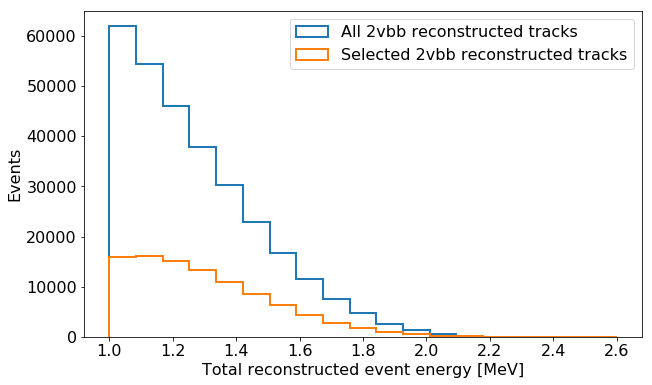

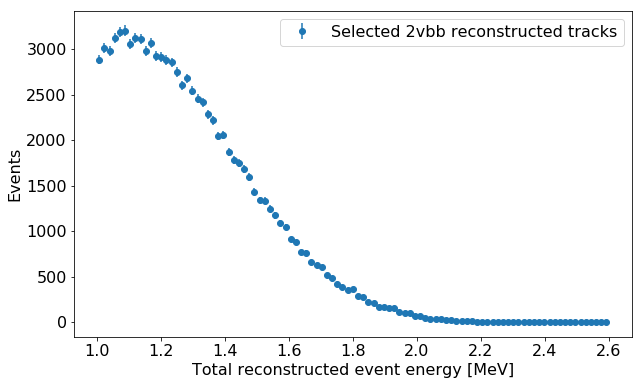

In [6]:
'''
Plot the energy of the reconstructed tracks before and after selection.
'''

plt.figure(figsize=(10,6))

ebins = np.linspace(1,2.6,20)
plt.hist(df_particles.groupby('event')['reco_energy'].first(), bins=ebins, histtype='step', lw=2, label='All 2vbb reconstructed tracks');
plt.hist(df_particles_selection.groupby('event')['reco_energy'].first(), bins=ebins, histtype='step', lw=2, label='Selected 2vbb reconstructed tracks');

plt.xlabel('Total reconstructed event energy [MeV]', fontsize=16)
plt.ylabel('Events', fontsize=16)
plt.tick_params(which='major', axis='both', labelsize=16)

plt.legend(loc='upper right', fontsize=16)


plt.figure(figsize=(10,6))

ebins = np.linspace(1,2.6,100)
bin_centers = (ebins[1:] + ebins[:-1])/2
energy_counts,_ = np.histogram(df_particles_selection.groupby('event')['reco_energy'].first(), bins=ebins)

plt.errorbar(bin_centers, energy_counts, yerr=np.sqrt(energy_counts), fmt='o', label='Selected 2vbb reconstructed tracks');

plt.xlabel('Total reconstructed event energy [MeV]', fontsize=16)
plt.ylabel('Events', fontsize=16)
plt.tick_params(which='major', axis='both', labelsize=16)

plt.legend(loc='upper right', fontsize=16)

# Distributions of physics variables
We can look at the distribution of physical variables in the full generated 2vbb set and compare it to the selected set of variables.
<br>
First, we look at the true simulated event energy, next, we look at the opening angle between the two electrons, and last, we look at the energy asymmetry of the two electrons (i.e. the fraction of the event energy that is carried by the higher energy electron.

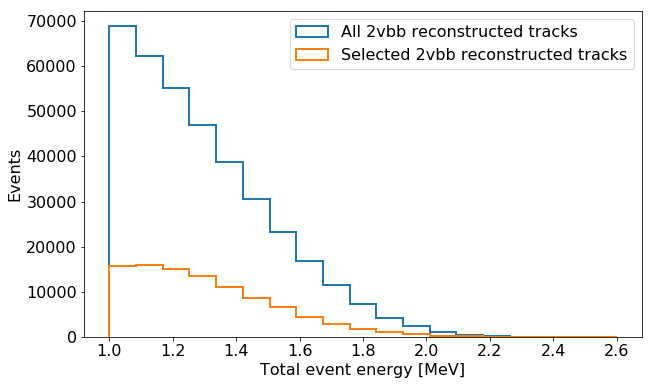

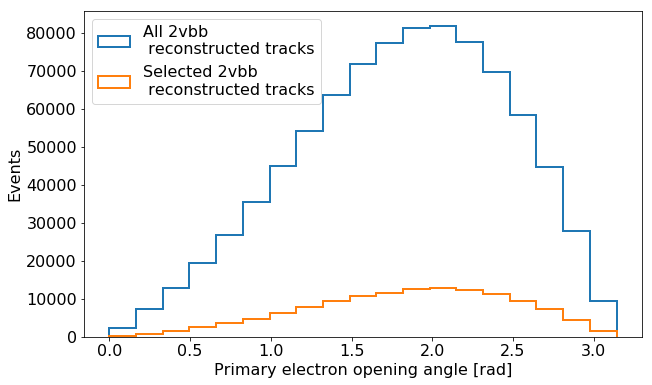

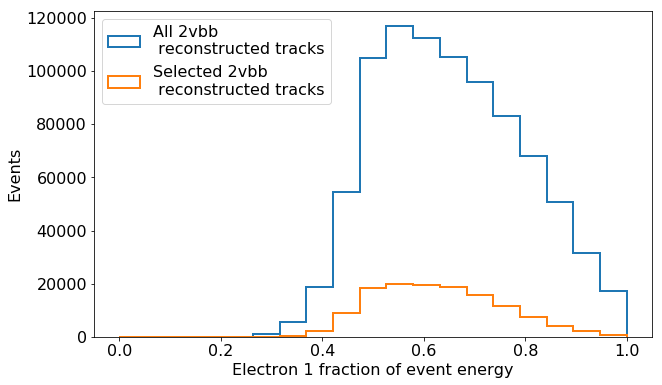

In [7]:
'''
Plot some MC true variables.
'''

plt.figure(figsize=(10,6))

ebins = np.linspace(1,2.6,20)
plt.hist(df_particles.groupby('event')['kin_energy'].sum(), bins=ebins, histtype='step', lw=2, label='All 2vbb reconstructed tracks');
plt.hist(df_particles_selection.groupby('event')['kin_energy'].sum(), bins=ebins, histtype='step', lw=2, label='Selected 2vbb reconstructed tracks');

plt.xlabel('Total event energy [MeV]', fontsize=16)
plt.ylabel('Events', fontsize=16)
plt.tick_params(which='major', axis='both', labelsize=16)

plt.legend(loc='upper right', fontsize=16)


plt.figure(figsize=(10,6))

abins = np.linspace(0,3.14159,20)
plt.hist(df_particles.groupby('event')['opening_angle'].first(), bins=abins, histtype='step', lw=2, label='All 2vbb\n reconstructed tracks');
plt.hist(df_particles_selection.groupby('event')['opening_angle'].first(), bins=abins, histtype='step', lw=2, label='Selected 2vbb\n reconstructed tracks');

plt.xlabel('Primary electron opening angle [rad]', fontsize=16)
plt.ylabel('Events', fontsize=16)
plt.tick_params(which='major', axis='both', labelsize=16)

plt.legend(loc='upper left', fontsize=16)


plt.figure(figsize=(10,6))

fbins = np.linspace(0,1.,20)
plt.hist(df_particles.groupby('event')['kin_energy'].max()/df_particles.groupby('event')['evt_energy'].first(), bins=fbins, histtype='step', lw=2, label='All 2vbb\n reconstructed tracks');
plt.hist(df_particles_selection.groupby('event')['kin_energy'].max()/df_particles_selection.groupby('event')['evt_energy'].first(), bins=fbins, histtype='step', lw=2, label='Selected 2vbb\n reconstructed tracks');

plt.xlabel('Electron 1 fraction of event energy', fontsize=16)
plt.ylabel('Events', fontsize=16)
plt.tick_params(which='major', axis='both', labelsize=16)

plt.legend(loc='upper left', fontsize=16)


# Effect on event selection from varying physics variables
There is some uncertainty in the true distribution of each of these variables. We can look and see how the reconstructed energy distribution of our final event selection would change if we vary these distributions.
<br>
We can do this by applying "weights" to events. If we assume that some events are underestimated, we weight them higher, and if we assume they are overestimated, we weight them lower. These weights are propagated through to the final reconstructed energy distribution where we can evaluate the effect.

## Opening angle
First, we look at what happens to the reconstructed energy distribution if the opening angle between the two electrons tends to be larger or smaller than what is predicted.
<br>
In the first example, we shift the true opening angle distribution to larger angles. To determine the weights, we estimated the number of events as a function of $cos(\theta)$. By eye, this function looks linear with a slope of $m=-\frac{1}{1.6}$, with a normalization equal to the ratio of the number of events to the number of bins used. In the cell below, the event counts as a function of $cos(\theta)$ is plotted with the estimated function for two different bin spacings.

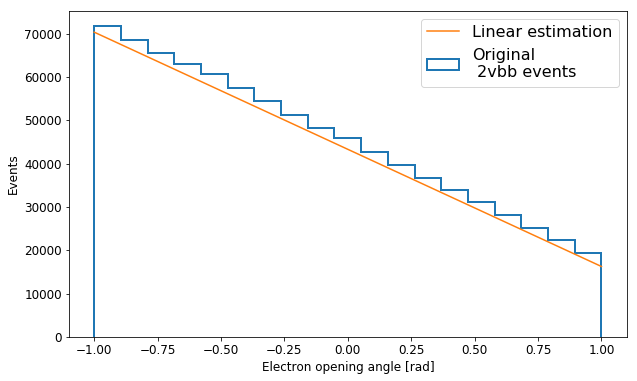

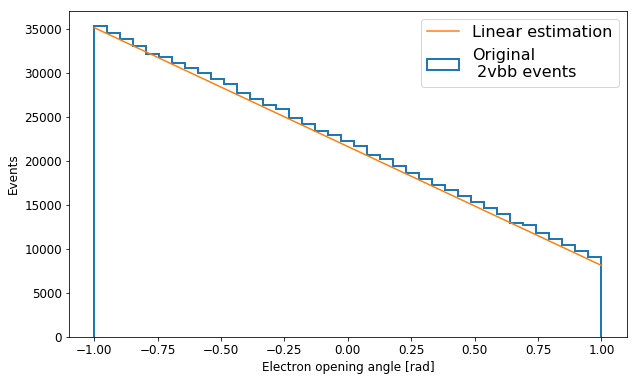

In [8]:
plt.figure(figsize=(10,6))

cabins = np.linspace(-1,1,20)
plt.hist(np.cos(df_particles.groupby('event')['opening_angle'].first()), bins=cabins, histtype='step', lw=2, label='Original\n 2vbb events');

binnorm = len(df_particles['event'].unique())/len(cabins)
slope = -1/1.6
plt.plot(cabins, (1 + cabins*slope)*binnorm, label='Linear estimation')


plt.ylabel('Events', fontsize=12)
plt.xlabel('Electron opening angle [rad]', fontsize=12)

plt.tick_params(which='major', axis='both', labelsize=12)
plt.tick_params(which='major', axis='both', labelsize=12)

plt.legend(loc='upper right', fontsize=16)

plt.figure(figsize=(10,6))

cabins = np.linspace(-1,1,40)
plt.hist(np.cos(df_particles.groupby('event')['opening_angle'].first()), bins=cabins, histtype='step', lw=2, label='Original\n 2vbb events');

binnorm = len(df_particles['event'].unique())/len(cabins)
slope = -1/1.6
plt.plot(cabins, (1 + cabins*slope)*binnorm, label='Linear estimation')


plt.ylabel('Events', fontsize=12)
plt.xlabel('Electron opening angle [rad]', fontsize=12)

plt.tick_params(which='major', axis='both', labelsize=12)
plt.tick_params(which='major', axis='both', labelsize=12)

plt.legend(loc='upper right', fontsize=16)

The weights are generated so that the $cos(\theta)$ of the events is 10% higher. The weight function is shown in the bottom plot in the following cell. The top plot shows the change in the opening angle distribution of all of the generated events.
<br><br>
To generate the weights, use the ratio of the linear function with the shifted $cos(\theta)$ to the original simulated one:
<br>
$w = \frac{f(cos(\theta)*(1+\delta))}{f(cos(\theta))} = \frac{(1+\delta)cos(\theta)+m}{cos(\theta)+m}$,
where $\delta$ is the systematic uncertainty. We then multiply the weights by a normalization factor, so that they add to the total number of events in the selection:
<br>
$\sum w = N_{selection}$.


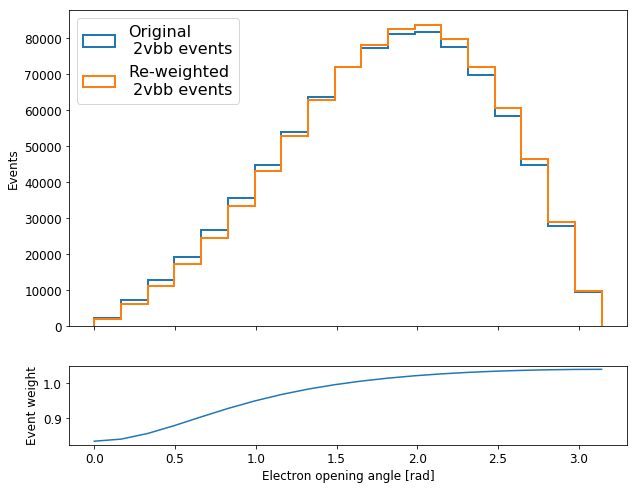

In [9]:
fig, ax = plt.subplots(nrows=2, figsize=(10,8), sharex=True, gridspec_kw={'height_ratios': [4, 1]})

syst_unc = 0.10 ## .# where the # is the #% therefore, 50% is .5
slope = -1.6
df_particles['weight'] = ((1 + syst_unc)*np.cos(df_particles['opening_angle']) + slope)/(np.cos(df_particles['opening_angle']) + slope)
weight_norm = len(df_particles['event'].unique())/df_particles.groupby('event')['weight'].first().sum()
df_particles['weight'] = df_particles['weight']*weight_norm

ax[0].hist(df_particles.groupby('event')['opening_angle'].first(), bins=abins, histtype='step', lw=2, label='Original\n 2vbb events');
ax[0].hist(df_particles.groupby('event')['opening_angle'].first(), weights=df_particles.groupby('event')['weight'].first(), bins=abins, histtype='step', lw=2, label='Re-weighted\n 2vbb events');

ax[1].plot(abins, ((1+syst_unc)*np.cos(abins) + slope)/(np.cos(abins) + slope)*weight_norm)

ax[0].set_ylabel('Events', fontsize=12)
ax[1].set_ylabel('Event weight', fontsize=12)
ax[1].set_xlabel('Electron opening angle [rad]', fontsize=12)

ax[0].tick_params(which='major', axis='both', labelsize=12)
ax[1].tick_params(which='major', axis='both', labelsize=12)

ax[0].legend(loc='upper left', fontsize=16)

Now we can look at the change in the reconstructed energy distribution of the final 2vbb selection.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


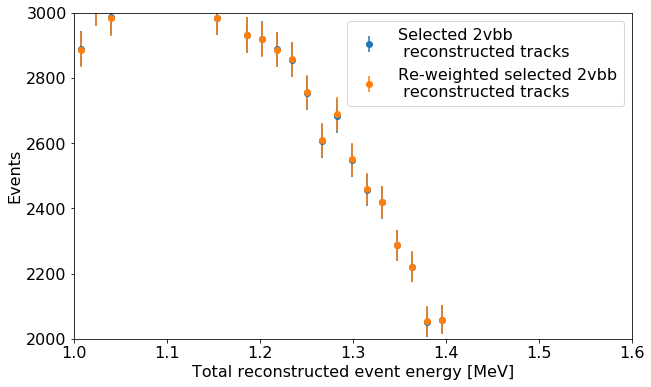

In [12]:
df_particles_selection['weight'] = ((1 + syst_unc)*np.cos(df_particles_selection['opening_angle']) + slope)/(np.cos(df_particles['opening_angle']) + slope)
weight_norm = len(df_particles_selection['event'].unique())/df_particles_selection.groupby('event')['weight'].first().sum()
df_particles_selection['weight'] = df_particles_selection['weight']*weight_norm

plt.figure(figsize=(10,6))

ebins = np.linspace(1,2.6,100)
bin_centers = (ebins[1:] + ebins[:-1])/2
energy_counts,_ = np.histogram(df_particles_selection.groupby('event')['reco_energy'].first(), bins=ebins)
energy_counts_reweight,_ = np.histogram(df_particles_selection.groupby('event')['reco_energy'].first(), bins=ebins, weights=df_particles_selection.groupby('event')['weight'].first())

plt.errorbar(bin_centers, energy_counts, yerr=np.sqrt(energy_counts), fmt='o', label='Selected 2vbb\n reconstructed tracks');
plt.errorbar(bin_centers, energy_counts_reweight, yerr=np.sqrt(energy_counts_reweight), fmt='o', label='Re-weighted selected 2vbb\n reconstructed tracks');

plt.xlabel('Total reconstructed event energy [MeV]', fontsize=16)
plt.ylabel('Events', fontsize=16)
plt.tick_params(which='major', axis='both', labelsize=16)

#plt.xlim(1,1.6)  use this to zoom in and out of the graph, this way we can see the error bars
#plt.ylim(2000,3000)

plt.legend(loc='upper right', fontsize=16)

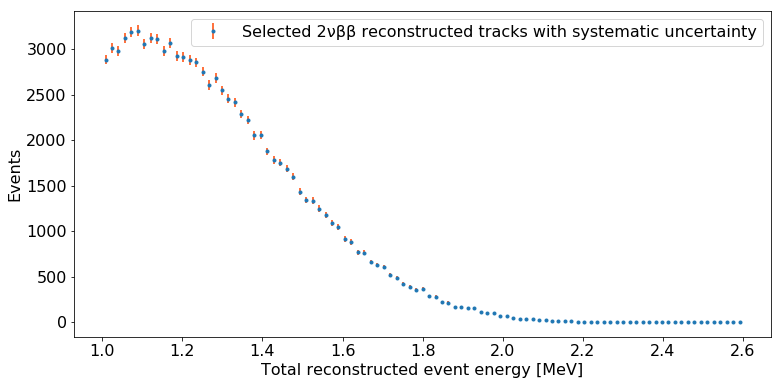

In [13]:
upper_bound_err,_ = np.histogram(df_particles_selection.groupby('event')['reco_energy'].first(), bins=ebins, weights=df_particles_selection.groupby('event')['weight'].first())

##above is +10, below is -10

lower_bound_err,_ = np.histogram(df_particles_selection.groupby('event')['reco_energy'].first(), bins=ebins, weights=df_particles_selection.groupby('event')['weight'].first())

energy_counts,_ = np.histogram(df_particles_selection.groupby('event')['reco_energy'].first(), bins=ebins)


part1 = np.maximum(upper_bound_err,lower_bound_err)
maxima = np.maximum(part1,energy_counts)


part2 = np.minimum(upper_bound_err,lower_bound_err)
minima = np.minimum(part2,energy_counts)

midpoints = energy_counts

points = (maxima+minima)*.5

ebins = np.linspace(1,2.6,100)
bin_centers = (ebins[1:] + ebins[:-1])/2 

plt.figure(figsize=(12.5,6))

#plt.xlim(1.8,1.825)
#plt.ylim(280,290)

plt.errorbar(bin_centers,points,yerr=[np.sqrt(energy_counts + (points-minima)**2), np.sqrt(energy_counts + (maxima-points)**2)],fmt='.', ecolor='orangered', label='Selected 2νββ reconstructed tracks with systematic uncertainty') 
plt.xlabel('Total reconstructed event energy [MeV]', fontsize=16)
plt.ylabel('Events', fontsize=16)
plt.tick_params(which='major', axis='both', labelsize=16)

plt.legend(loc='upper right', fontsize=16)

plt.savefig('Reweighted systematic uncertantity plot.png', dpi=300, bbox_inches='tight') 




//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


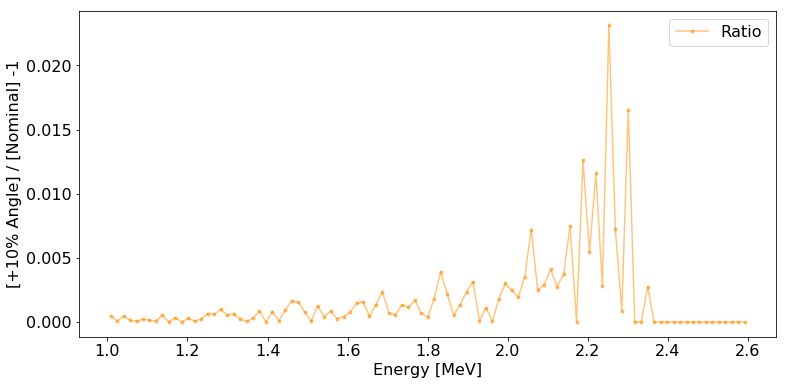

In [166]:
maxima = np.maximum(part1,energy_counts)

bin_centers = (ebins[1:] + ebins[:-1])/2  ##this should be the x list
ratio = (maxima/points) -1 #this is the y points, x list should be energy points

ratio[np.isnan(ratio)]=0.0

plt.figure(figsize=(12.5,6))

plt.plot(bin_centers, ratio ,label='Ratio',alpha=0.5, marker='.',color='darkorange')

plt.xlabel('Energy [MeV]', fontsize=16)
plt.ylabel('[+10% Angle] / [Nominal] -1', fontsize=16)
plt.tick_params(which='major', axis='both', labelsize=16)

plt.legend(loc='best', fontsize=16)

plt.savefig('Ratio.png', dpi=300, bbox_inches='tight') 

In the next example, we do the same thing, except now we assume that the opening angles were overestimated.
<br>
The new weights decrease $cos(\theta)$ by 10%.
<br>
$w = \frac{f(cos(\theta)*(1-\delta))}{f(cos(\theta))} = \frac{(1-\delta)cos(\theta)+m}{cos(\theta)+m}$,

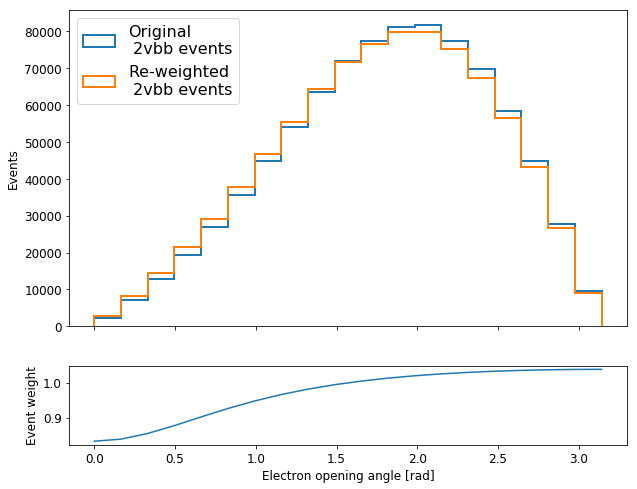

In [11]:
fig, ax = plt.subplots(nrows=2, figsize=(10,8), sharex=True, gridspec_kw={'height_ratios': [4, 1]})

syst_unc = 0.10
slope = -1.6
df_particles['weight'] = ((1 - syst_unc)*np.cos(df_particles['opening_angle']) + slope)/(np.cos(df_particles['opening_angle']) + slope)
weight_norm = len(df_particles['event'].unique())/df_particles.groupby('event')['weight'].first().sum()
df_particles['weight'] = df_particles['weight']*weight_norm

ax[0].hist(df_particles.groupby('event')['opening_angle'].first(), bins=abins, histtype='step', lw=2, label='Original\n 2vbb events');
ax[0].hist(df_particles.groupby('event')['opening_angle'].first(), weights=df_particles.groupby('event')['weight'].first(), bins=abins, histtype='step', lw=2, label='Re-weighted\n 2vbb events');

ax[1].plot(abins, ((1+syst_unc)*np.cos(abins) + slope)/(np.cos(abins) + slope)*weight_norm)

ax[0].set_ylabel('Events', fontsize=12)
ax[1].set_ylabel('Event weight', fontsize=12)
ax[1].set_xlabel('Electron opening angle [rad]', fontsize=12)

ax[0].tick_params(which='major', axis='both', labelsize=12)
ax[1].tick_params(which='major', axis='both', labelsize=12)

ax[0].legend(loc='upper left', fontsize=16)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


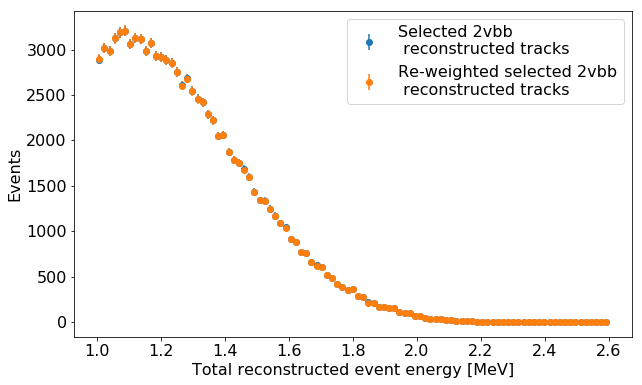

In [12]:
df_particles_selection['weight'] = ((1 - syst_unc)*np.cos(df_particles_selection['opening_angle']) + slope)/(np.cos(df_particles_selection['opening_angle']) + slope)
weight_norm = len(df_particles_selection['event'].unique())/df_particles_selection.groupby('event')['weight'].first().sum()
df_particles_selection['weight'] = df_particles_selection['weight']*weight_norm

plt.figure(figsize=(10,6))

ebins = np.linspace(1,2.6,100)
bin_centers = (ebins[1:] + ebins[:-1])/2
energy_counts,_ = np.histogram(df_particles_selection.groupby('event')['reco_energy'].first(), bins=ebins)
energy_counts_reweight,_ = np.histogram(df_particles_selection.groupby('event')['reco_energy'].first(), bins=ebins, weights=df_particles_selection.groupby('event')['weight'].first())

plt.errorbar(bin_centers, energy_counts, yerr=np.sqrt(energy_counts), fmt='o', label='Selected 2vbb\n reconstructed tracks');
plt.errorbar(bin_centers, energy_counts_reweight, yerr=np.sqrt(energy_counts_reweight), fmt='o', label='Re-weighted selected 2vbb\n reconstructed tracks');

plt.xlabel('Total reconstructed event energy [MeV]', fontsize=16)
plt.ylabel('Events', fontsize=16)
plt.tick_params(which='major', axis='both', labelsize=16)

plt.legend(loc='upper right', fontsize=16)